In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
from folium.plugins import HeatMap
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import unicodedata
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import plotly.graph_objects as go

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Set options to display all rows and columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap lines
pd.set_option('display.max_colwidth', None) # Show full content in each cell (esp. for long strings)
census_all = pd.read_csv("census_real_estate_data - all places.csv")
census_county = pd.read_csv("census_real_estate_data_county.csv")
real_df = pd.read_csv("Connecticut_Louisiana_Real_Estate.csv")
social_media_real_estate = pd.read_csv("reddit_real_estate_data_balanced.csv")
crime_data = pd.read_excel("Crime Data(Louisiana_Connecticut).xlsx")
census_all.rename(columns={'state': 'state_fips'}, inplace=True)
census_county.rename(columns={'state': 'state_fips'}, inplace=True)
### Cleaning up the Data
data_list = [census_all, census_county, real_df, social_media_real_estate, crime_data]
for data in data_list:
    # Display initial information
    print(f"Original data shape: {data.shape}")
    print("\nColumns in the dataset:")
    for col in data.columns:
        print(f"- {col}")

    print("\nFirst few rows:")
    print(data.head())

    # Check for missing values
    print("\nMissing values percentage:")
    missing_percentage = data.isnull().mean() * 100

    # Sort missing percentages from highest to lowest
    sorted_missing = missing_percentage.sort_values(ascending=False)
for col, pct in sorted_missing.items():
    if pct > 0:  # Only show columns with missing values
        print(f"{col}: {pct:.2f}%")
census_all.shape
print(census_all.info())
print(census_all.isnull().sum())
print(census_all.isnull().mean() * 100)
data_list = [census_all, census_county, real_df, social_media_real_estate, crime_data]

for data in data_list:
    print(data.shape)
    print(data.info())
    print(data.isnull().sum())
    print(data.isnull().mean() * 100)
# List of datasets
data_list = [census_all, census_county, real_df, social_media_real_estate, crime_data]
dataset_names = ["census_all", "census_county", "real_df", "social_media_real_estate", "crime_data"]

# Threshold for missing values
threshold = 0.8

# Function to clean a dataset
def clean_dataset(data, name):
    print(f"Cleaning dataset: {name}")

    # Step 1: Remove columns with more than 80% missing values
    missing_percentage = data.isnull().mean()
    columns_to_drop = missing_percentage[missing_percentage > threshold].index
    print(f"Columns to drop (more than {threshold * 100}% missing values): {list(columns_to_drop)}")
    data.drop(columns=columns_to_drop, inplace=True)

    # Step 2: Handle remaining missing values (fill with median for numeric columns)
    for col in data.columns:
        if data[col].isnull().sum() > 0:
            if data[col].dtype in ['float64', 'int64']:
                data[col].fillna(data[col].median(), inplace=True)
            else:
                data[col].fillna(data[col].mode()[0], inplace=True)

    # Step 3: Remove duplicate rows
    initial_shape = data.shape
    data.drop_duplicates(inplace=True)
    print(f"Removed {initial_shape[0] - data.shape[0]} duplicate rows.")

    # Step 4: Standardize column names
    data.columns = data.columns.str.lower().str.replace(' ', '_').str.replace('\n', '_')
    print(f"Standardized column names: {list(data.columns)}")

    # Step 5: Display final shape
    print(f"Final shape of {name}: {data.shape}\n")
    return data

# Clean each dataset
for i, data in enumerate(data_list):
    data_list[i] = clean_dataset(data, dataset_names[i])
for data in data_list:
    print(data.isnull().sum())

Original data shape: (5898, 44)

Columns in the dataset:
- NAME
- B01003_001E
- B01002_001E
- B25010_001E
- B15003_017E
- B15003_022E
- B02001_002E
- B02001_003E
- B03003_003E
- B01001_002E
- B01001_026E
- B01001_003E
- B01001_007E
- B01001_012E
- B01001_020E
- B25001_001E
- B25002_002E
- B25002_003E
- B25003_002E
- B25003_003E
- B25077_001E
- B25064_001E
- B25024_002E
- B25024_003E
- B25024_004E
- B25034_001E
- B25081_002E
- B25081_003E
- B25004_001E
- B25003_001E
- B19013_001E
- B19301_001E
- B23025_005E
- B23025_002E
- B17001_002E
- B17001_001E
- C24010_001E
- B19057_002E
- B08303_001E
- B08101_001E
- state_fips
- place
- State
- Year

First few rows:
                                    NAME  B01003_001E  B01002_001E  \
0           Broad Brook CDP, Connecticut         4504         32.1   
1          New Britain city, Connecticut        72988         33.9   
2      Heritage Village CDP, Connecticut         3934         71.6   
3  North Grosvenor Dale CDP, Connecticut         1707    

C:\Users\Admin\AppData\Local\Temp\ipykernel_16028\2007926673.py:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16028\2007926673.py:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Columns to drop (more than 80.0% missing values): []


C:\Users\Admin\AppData\Local\Temp\ipykernel_16028\2007926673.py:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16028\2007926673.py:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Removed 0 duplicate rows.
Standardized column names: ['unnamed:_0', 'period_begin', 'period_end', 'period_duration', 'region_type', 'region_type_id', 'table_id', 'is_seasonally_adjusted', 'region', 'city', 'state', 'state_code', 'property_type', 'property_type_id', 'median_sale_price', 'median_sale_price_mom', 'median_sale_price_yoy', 'median_list_price', 'median_list_price_mom', 'median_list_price_yoy', 'median_ppsf', 'median_ppsf_mom', 'median_ppsf_yoy', 'median_list_ppsf', 'median_list_ppsf_mom', 'median_list_ppsf_yoy', 'homes_sold', 'homes_sold_mom', 'homes_sold_yoy', 'pending_sales', 'pending_sales_mom', 'pending_sales_yoy', 'new_listings', 'new_listings_mom', 'new_listings_yoy', 'inventory', 'inventory_mom', 'inventory_yoy', 'months_of_supply', 'months_of_supply_mom', 'months_of_supply_yoy', 'median_dom', 'median_dom_mom', 'median_dom_yoy', 'avg_sale_to_list', 'avg_sale_to_list_mom', 'avg_sale_to_list_yoy', 'sold_above_list', 'sold_above_list_mom', 'sold_above_list_yoy', 'price_d

C:\Users\Admin\AppData\Local\Temp\ipykernel_16028\2007926673.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16028\2007926673.py:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

unnamed:_0                        0
period_begin                      0
period_end                        0
period_duration                   0
region_type                       0
region_type_id                    0
table_id                          0
is_seasonally_adjusted            0
region                            0
city                              0
state                             0
state_code                        0
property_type                     0
property_type_id                  0
median_sale_price                 0
median_sale_price_mom             0
median_sale_price_yoy             0
median_list_price                 0
median_list_price_mom             0
median_list_price_yoy             0
median_ppsf                       0
median_ppsf_mom                   0
median_ppsf_yoy                   0
median_list_ppsf                  0
median_list_ppsf_mom              0
median_list_ppsf_yoy              0
homes_sold                        0
homes_sold_mom              

In [3]:
# # Extract base city
# census_all['base_city'] = census_all['name'].str.extract(r'^([\w\s\-]+) (city|town|village),')[0]

# # Merge
# merged_df = pd.merge(census_all, crime_data, left_on='base_city', right_on='city', how='inner')
# # Calculate crime rate per 1000 people
# merged_df['total_crimes'] = merged_df['violent_crime'] + merged_df['property_crime'] + merged_df['arson3']
# merged_df['crime_rate'] = (merged_df['total_crimes'] / merged_df['b01003_001e']) * 1000
# merged_df.head()


In [4]:
geojson_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
geojson_data = requests.get(geojson_url).json()

In [5]:
crime_data.head()

city  population  violent_crime  \
0     Ansonia       18887           25.0   
1        Avon       18485            2.0   
2      Berlin       20793           15.0   
3      Bethel       19560            4.0   
4  Bloomfield       20901           57.0   

   murder_and_nonnegligent_manslaughter  rape_(revised_definition)1  robbery  \
0                                     0                           5     12.0   
1                                     0                           1      1.0   
2                                     0                           2      7.0   
3                                     0                           4      0.0   
4                                     1                           8      6.0   

   aggravated_assault  property_crime  burglary  larceny-_theft  \
0                 8.0           350.0      47.0           264.0   
1                 0.0           147.0      14.0           130.0   
2                 6.0           321.0      59.0           243.0   
3                 0.0           169.0      26.0           141.0   
4                42.0           505.0      66.0           417.0   

   motor_vehicle_theft  arson3        state  year  
0                   39     0.0  Connecticut  2015  
1                    3     0.0  Connecticut  2015  
2                   19     2.0  Connecticut  2015  
3                    2     0.0  Connecticut  2015  
4                   22     0.0  Connecticut  2015

In [6]:
crime_data['total_crimes'] = crime_data['violent_crime'] + crime_data['property_crime'] + crime_data['arson3']
crime_data['crime_rate'] = (crime_data['total_crimes'] / crime_data['population']) * 1000
crime_data.head()

city  population  violent_crime  \
0     Ansonia       18887           25.0   
1        Avon       18485            2.0   
2      Berlin       20793           15.0   
3      Bethel       19560            4.0   
4  Bloomfield       20901           57.0   

   murder_and_nonnegligent_manslaughter  rape_(revised_definition)1  robbery  \
0                                     0                           5     12.0   
1                                     0                           1      1.0   
2                                     0                           2      7.0   
3                                     0                           4      0.0   
4                                     1                           8      6.0   

   aggravated_assault  property_crime  burglary  larceny-_theft  \
0                 8.0           350.0      47.0           264.0   
1                 0.0           147.0      14.0           130.0   
2                 6.0           321.0      59.0           243.0   
3                 0.0           169.0      26.0           141.0   
4                42.0           505.0      66.0           417.0   

   motor_vehicle_theft  arson3        state  year  total_crimes  crime_rate  
0                   39     0.0  Connecticut  2015         375.0   19.854927  
1                    3     0.0  Connecticut  2015         149.0    8.060590  
2                   19     2.0  Connecticut  2015         338.0   16.255471  
3                    2     0.0  Connecticut  2015         173.0    8.844581  
4                   22     0.0  Connecticut  2015         562.0   26.888666

In [7]:
# Clean city names
census_all = census_all[~census_all["name"].str.contains("CDP|town|village", case=False, na=False)]
census_all['base_city'] = census_all['name'].str.extract(r'^([\w\s\-]+) (city|town|village),')[0]

C:\Users\Admin\AppData\Local\Temp\ipykernel_16028\695804781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_all['base_city'] = census_all['name'].str.extract(r'^([\w\s\-]+) (city|town|village),')[0]


##### How do crime rates vary across neighborhoods and counties?

In [8]:
# 11. Crime rate visualization (state-specific)
def crime_rate_analysis(census_all, crime_data, state):
    if crime_data is None:
        print("Crime data not available for analysis")
        return

    # Filter by state
    census_all = census_all[census_all["state"] == state]
    crime_data = crime_data[crime_data["state"] == state]

    # Merge datasets
    merged_df = pd.merge(census_all, crime_data, left_on='base_city', right_on='city', how='inner')

    if merged_df.empty:
        print(f"No matching data found for state: {state}")
        return

    # Calculate crime rate per 1000 people
    merged_df['total_crimes'] = merged_df['violent_crime'] + merged_df['property_crime'] + merged_df['arson3']
    merged_df['crime_rate'] = (merged_df['total_crimes'] / merged_df['b01003_001e']) * 1000

    # Plot 1: Barplot of crime rate by city/city
    plt.figure(figsize=(12, 8))
    g = sns.barplot(x='name', y='crime_rate', hue='state_x', data=merged_df.sort_values('crime_rate', ascending=False))
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.title(f'Crime Rate per 1000 People by City - {state}')
    plt.xlabel('City')
    plt.ylabel('Crime Rate per 1000 People')
    plt.tight_layout()
    plt.savefig(f'crime_rate_by_city_{state}.png', dpi=300)

    # Plot 2: Crime rate vs. property value
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='crime_rate', y='b25077_001e', hue='state_x', size='b01003_001e', 
                    sizes=(50, 500), alpha=0.7, data=merged_df)
    plt.title(f'Crime Rate vs. Median Home Value - {state}')
    plt.xlabel('Crime Rate per 1000 People')
    plt.ylabel('Median Home Value ($)')
    plt.tight_layout()
    plt.savefig(f'crime_vs_property_value_{state}.png', dpi=300)

In [9]:
def plot_crime_rate_by_state(crime_data, geojson_data):
    # Choropleth by state (using full state names in crime_data)
    if 'state' in crime_data.columns and 'crime_rate' in crime_data.columns:
        # Load US States GeoJSON
        # geojson_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
        # geojson_data = requests.get(geojson_url).json()

        # Load GeoJSON and create map
        # First, create the choropleth map
        fig = px.choropleth_mapbox(
            crime_data,
            geojson=geojson_data,
            locations='state',
            featureidkey='properties.name',
            color='crime_rate',
            hover_name='state',
            color_continuous_scale='YlOrRd',
            mapbox_style='carto-positron',  # or 'open-street-map', 'carto-darkmatter', 'satellite-streets'
            zoom=3,
            center={"lat": 37.0902, "lon": -95.7129},  # roughly center of US
            title='Crime Rate per 1000 People by State'
        )

        fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
        fig.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16028\1634768597.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


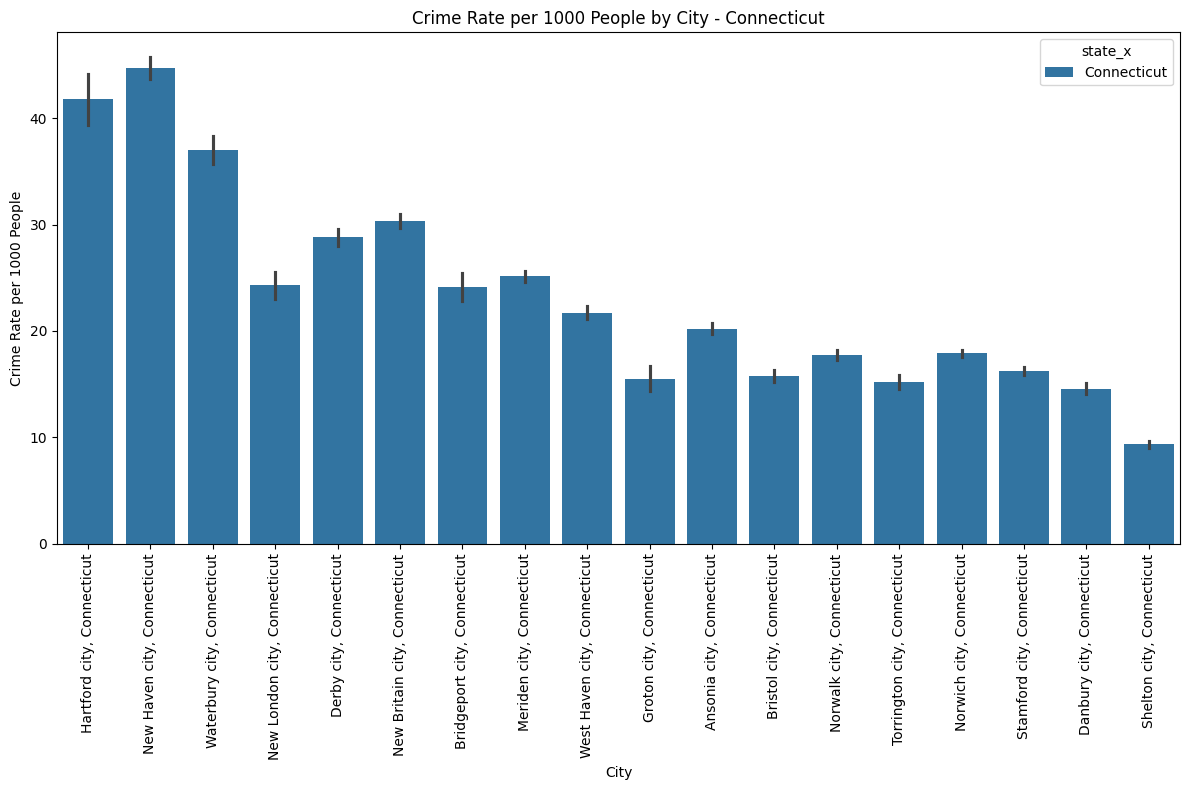

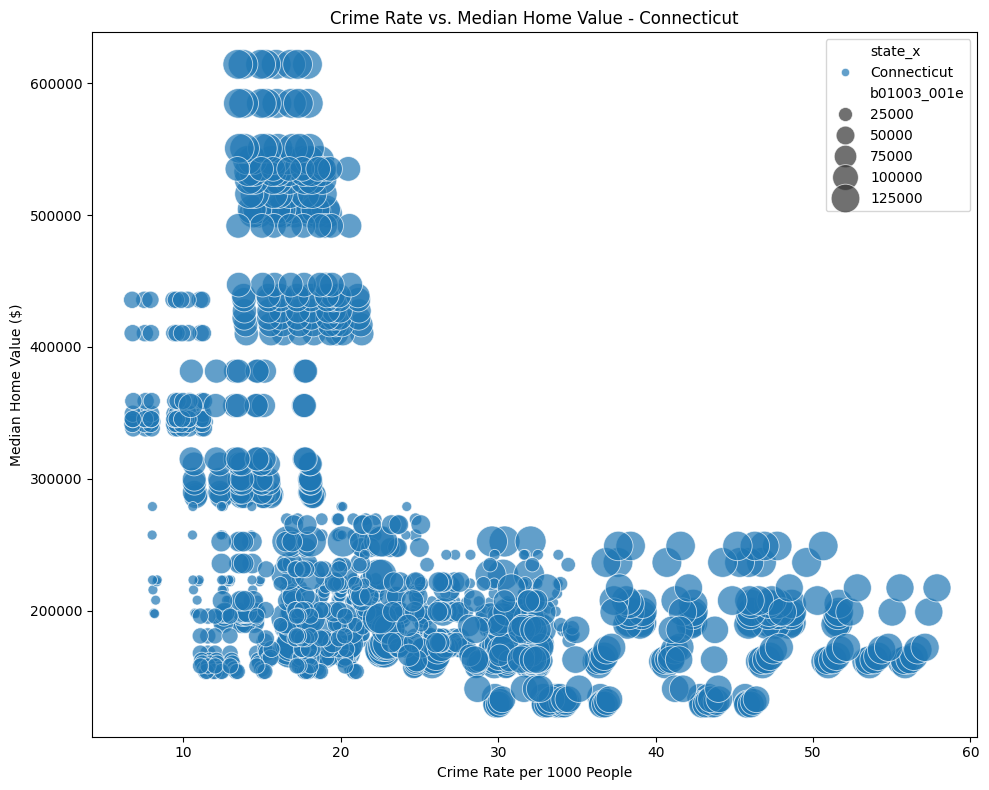

In [10]:
crime_rate_analysis(census_all, crime_data, "Connecticut")

C:\Users\Admin\AppData\Local\Temp\ipykernel_16028\1634768597.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


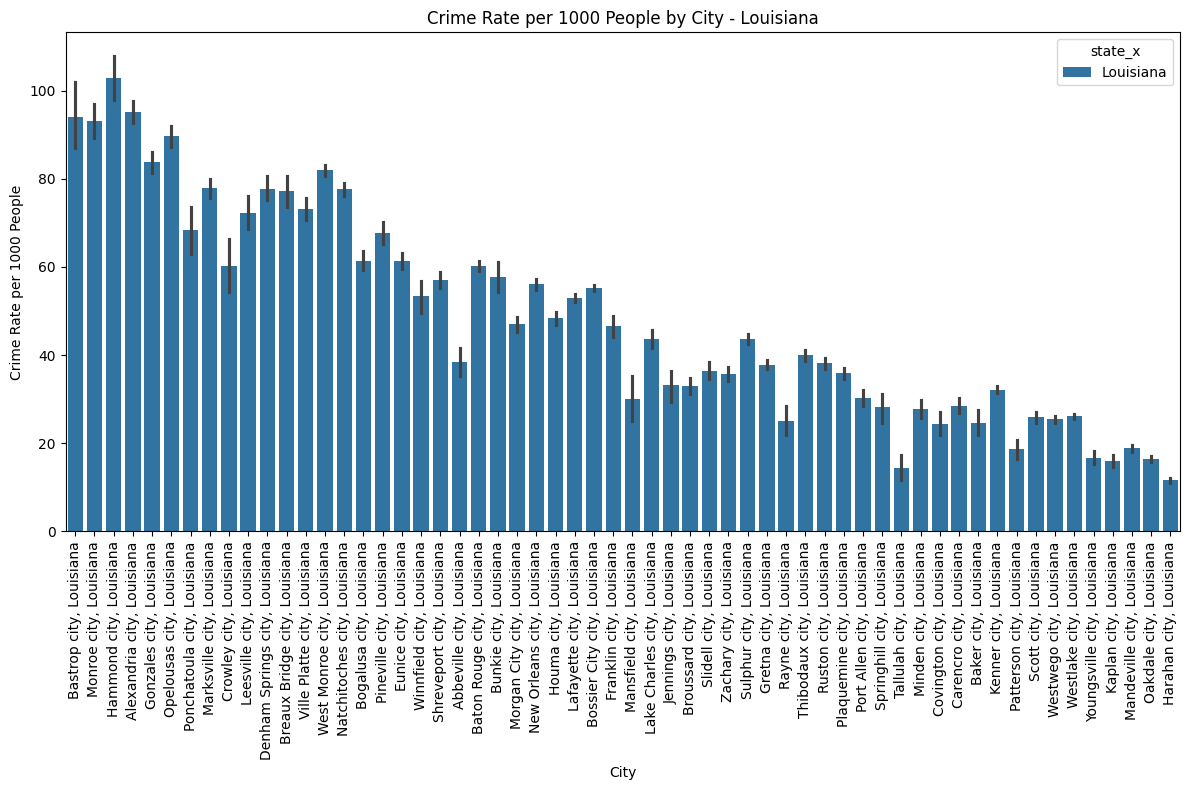

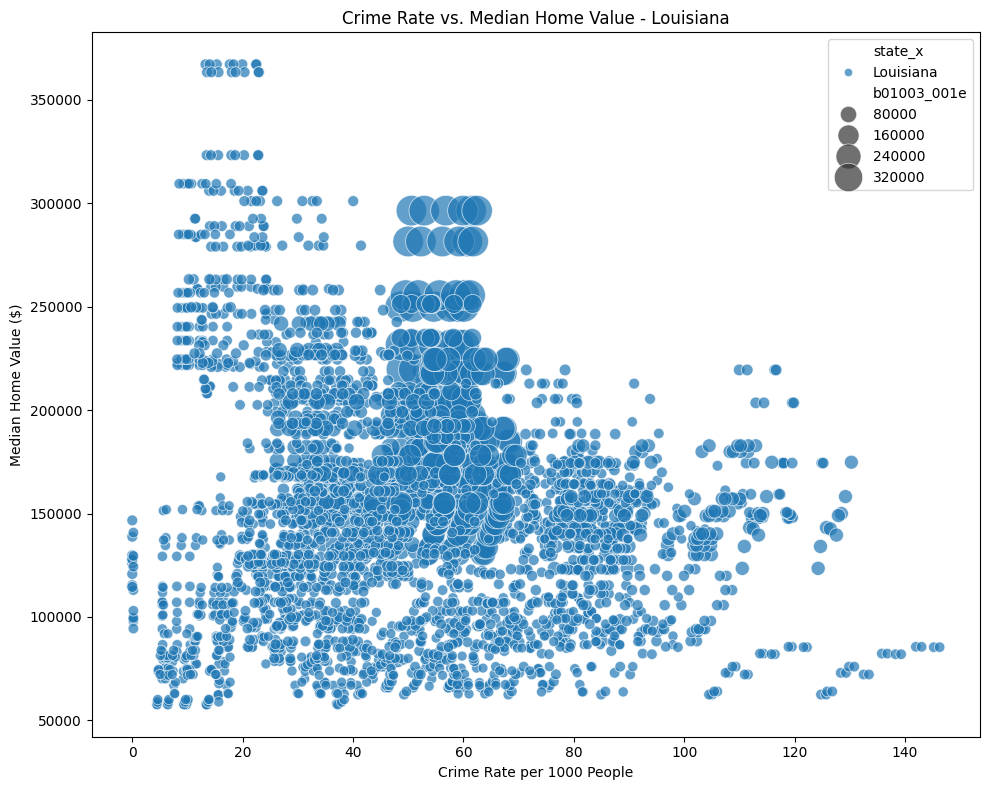

In [11]:
crime_rate_analysis(census_all, crime_data, "Louisiana")

In [12]:
plot_crime_rate_by_state(crime_data, geojson_data)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16028\3494410609.py:10: DeprecationWarning: *choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.choropleth_mapbox(


In [13]:
census_all.columns

Index(['name', 'b01003_001e', 'b01002_001e', 'b25010_001e', 'b15003_017e',
       'b15003_022e', 'b02001_002e', 'b02001_003e', 'b03003_003e',
       'b01001_002e', 'b01001_026e', 'b01001_003e', 'b01001_007e',
       'b01001_012e', 'b01001_020e', 'b25001_001e', 'b25002_002e',
       'b25002_003e', 'b25003_002e', 'b25003_003e', 'b25077_001e',
       'b25064_001e', 'b25024_002e', 'b25024_003e', 'b25024_004e',
       'b25034_001e', 'b25081_002e', 'b25081_003e', 'b25004_001e',
       'b25003_001e', 'b19013_001e', 'b19301_001e', 'b23025_005e',
       'b23025_002e', 'b17001_002e', 'b17001_001e', 'c24010_001e',
       'b19057_002e', 'b08303_001e', 'b08101_001e', 'state_fips', 'place',
       'state', 'year', 'base_city'],
      dtype='object')

#####  What is the spatial distribution of high-value vs. low-value properties across the states?

In [14]:
def property_value_analysis(census_data):
    # Filter for most recent year
    recent_data = census_data[census_data['year'] == 2023].copy()
    
    # Create categories for property values
    bins = [0, 100000, 150000, 200000, 300000, 500000]
    labels = ['Under $100K', '$100K-$150K', '$150K-$200K', '$200K-$300K', 'Over $300K']
    recent_data['value_category'] = pd.cut(recent_data['b25077_001e'], bins=bins, labels=labels)

    # Optional: Bar chart distribution
    value_counts = pd.crosstab(recent_data['state'], recent_data['value_category'])
    value_counts.plot(kind='bar', stacked=True, colormap='viridis')

    # Plot choropleth map with Mapbox background
    fig = px.choropleth_mapbox(
        recent_data,
        geojson=geojson_data,
        locations='state',                        # Full state names
        featureidkey='properties.name',           # GeoJSON matches on full name
        color='value_category',                      # Median home value
        color_continuous_scale='YlOrRd',
        mapbox_style='carto-positron',
        zoom=3,
        center={"lat": 37.0902, "lon": -95.7129},  # Center on US
        hover_name='state',
        hover_data={'b25077_001e': True},
        title='Median Property Value by State (2017)'
    )

    fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
    fig.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_16028\2390773572.py:15: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



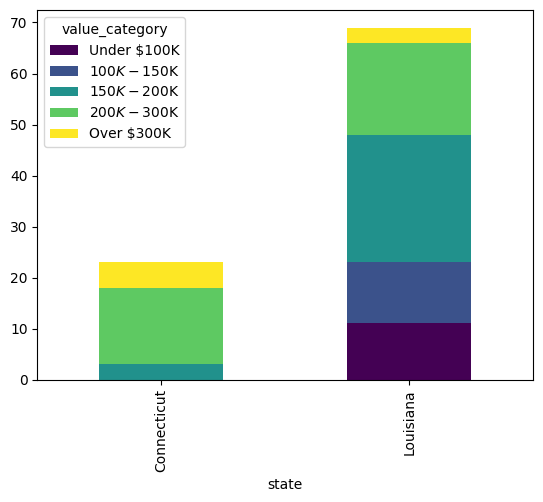

In [15]:
property_value_analysis(census_all)

##### Are certain counties experiencing population growth or decline, and how does that affect real estate demand?

In [ ]:
# 16. Population change and real estate demand
def population_change_analysis(census_data, state):
    # Filter data by state
    state_data = census_data[census_data['state'] == state]

    # Get data for 2015 and 2017
    data_2015 = state_data[state_data['year'] == 2015]
    data_2017 = state_data[state_data['year'] == 2017]

    # Merge to calculate changes
    pop_change = pd.merge(
        data_2015[['name', 'b01003_001e', 'b25077_001e']], 
        data_2017[['name', 'b01003_001e', 'b25077_001e']],
        on='name', suffixes=('_2015', '_2017')
    )
    pop_change['state'] = state  # Reattach state info if needed later
    pop_change = pop_change[pop_change['b25077_001e_2017'] != -666666666]
    # Calculate percentage changes
    pop_change['pop_change_pct'] = (
        (pop_change['b01003_001e_2017'] - pop_change['b01003_001e_2015']) /
        pop_change['b01003_001e_2015'] * 100
    )
    pop_change['home_value_change_pct'] = (
        (pop_change['b25077_001e_2017'] - pop_change['b25077_001e_2015']) /
        pop_change['b25077_001e_2015'] * 100
    )

    # Plot population change vs home value change
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        x='pop_change_pct', y='home_value_change_pct', size='b01003_001e_2017',
        sizes=(50, 500), data=pop_change, alpha=0.7
    )

    # Label cities with notable changes
    for idx, row in pop_change.iterrows():
        if abs(row['pop_change_pct']) > 2 or abs(row['home_value_change_pct']) > 5:
            plt.text(row['pop_change_pct'], row['home_value_change_pct'], 
                     row['name'].split(',')[0], fontsize=8)

    plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
    plt.axvline(x=0, color='gray', linestyle='--', alpha=0.7)
    plt.title(f'Population vs. Home Value Change in {state} (2015–2017)')
    plt.xlabel('Population Change (%)')
    plt.ylabel('Median Home Value Change (%)')
    plt.tight_layout()
    plt.savefig(f'{state.lower().replace(" ", "_")}_population_vs_value_change.png', dpi=300)
    
    # Bar chart of top growing and declining counties
    top_growing = pop_change.sort_values('pop_change_pct', ascending=False).head(10)
    top_declining = pop_change.sort_values('pop_change_pct', ascending=True).head(10)

    fig, axes = plt.subplots(1, 2, figsize=(15, 8))

    # Growing counties
    sns.barplot(x='name', y='pop_change_pct', data=top_growing, ax=axes[0])
    axes[0].set_xticklabels([x.split(',')[0] for x in top_growing['name']], rotation=90)
    axes[0].set_title(f'Top 10 Growing Cities in {state}')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Population Change (%)')

    # Declining counties
    sns.barplot(x='name', y='pop_change_pct', data=top_declining, ax=axes[1])
    axes[1].set_xticklabels([x.split(',')[0] for x in top_declining['name']], rotation=90)
    axes[1].set_title(f'Top 10 Declining Cities in {state}')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('Population Change (%)')

    plt.tight_layout()
    plt.savefig(f'{state.lower().replace(" ", "_")}_population_change_cities.png', dpi=300)


C:\Users\Admin\AppData\Local\Temp\ipykernel_16028\2653098843.py:57: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Admin\AppData\Local\Temp\ipykernel_16028\2653098843.py:64: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



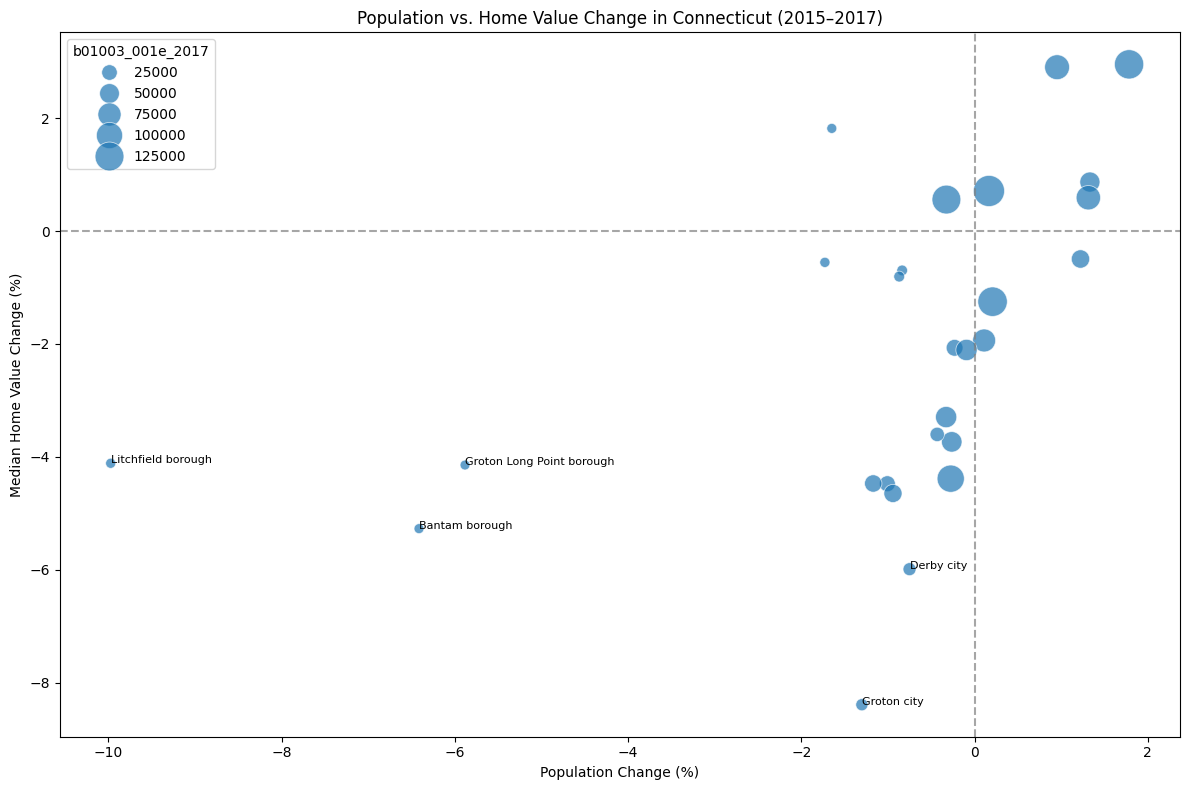

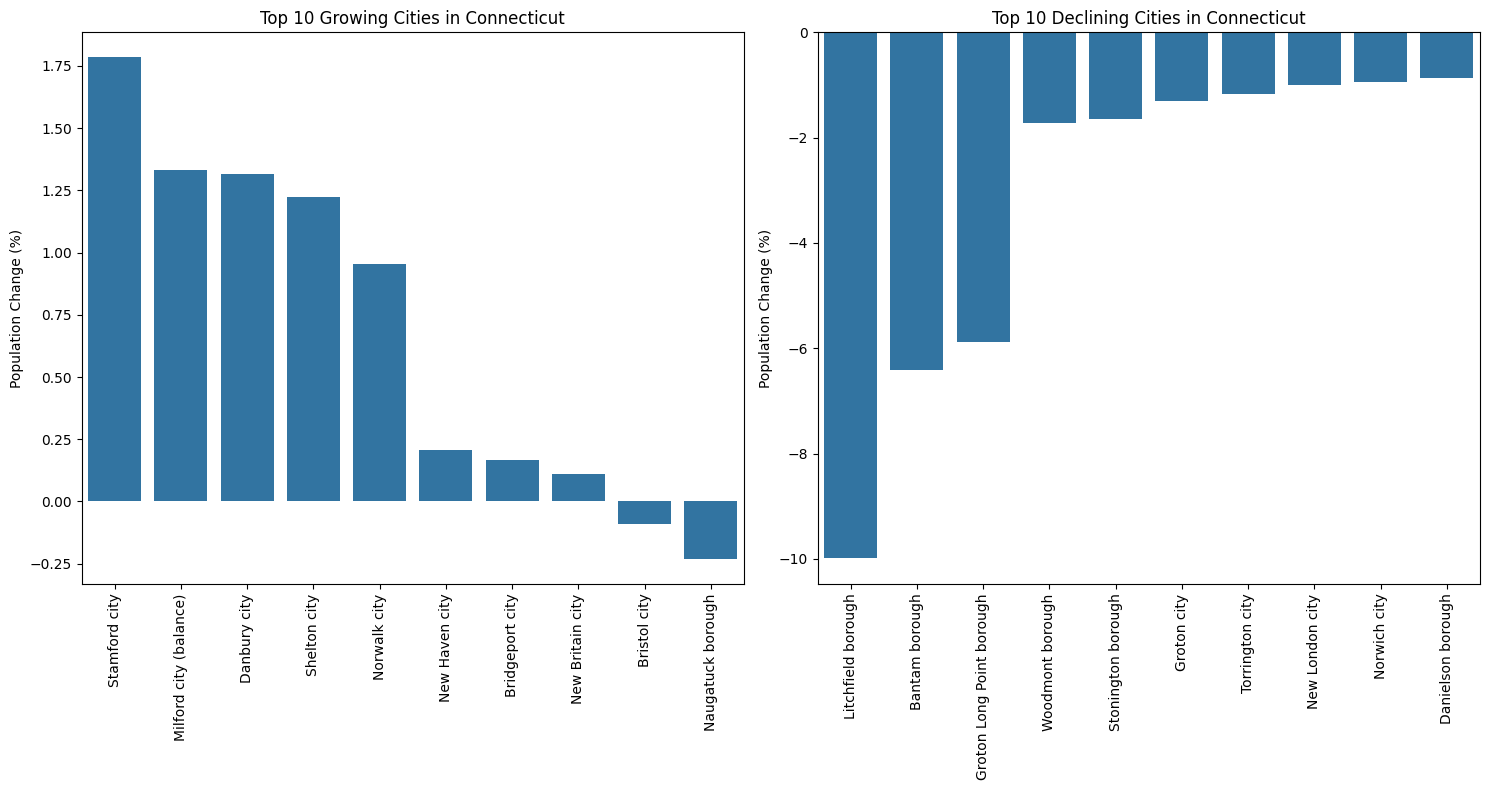

In [17]:
population_change_analysis(census_all, "Connecticut")

C:\Users\Admin\AppData\Local\Temp\ipykernel_16028\2653098843.py:57: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Admin\AppData\Local\Temp\ipykernel_16028\2653098843.py:64: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



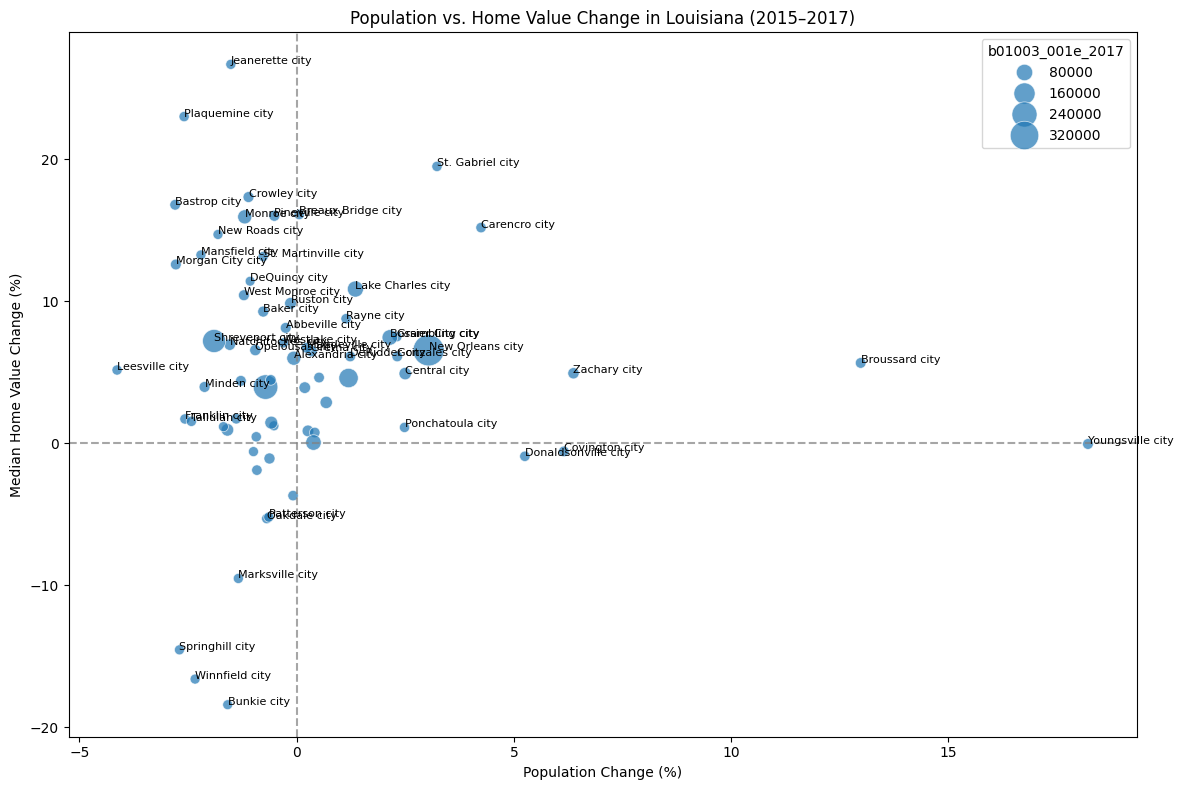

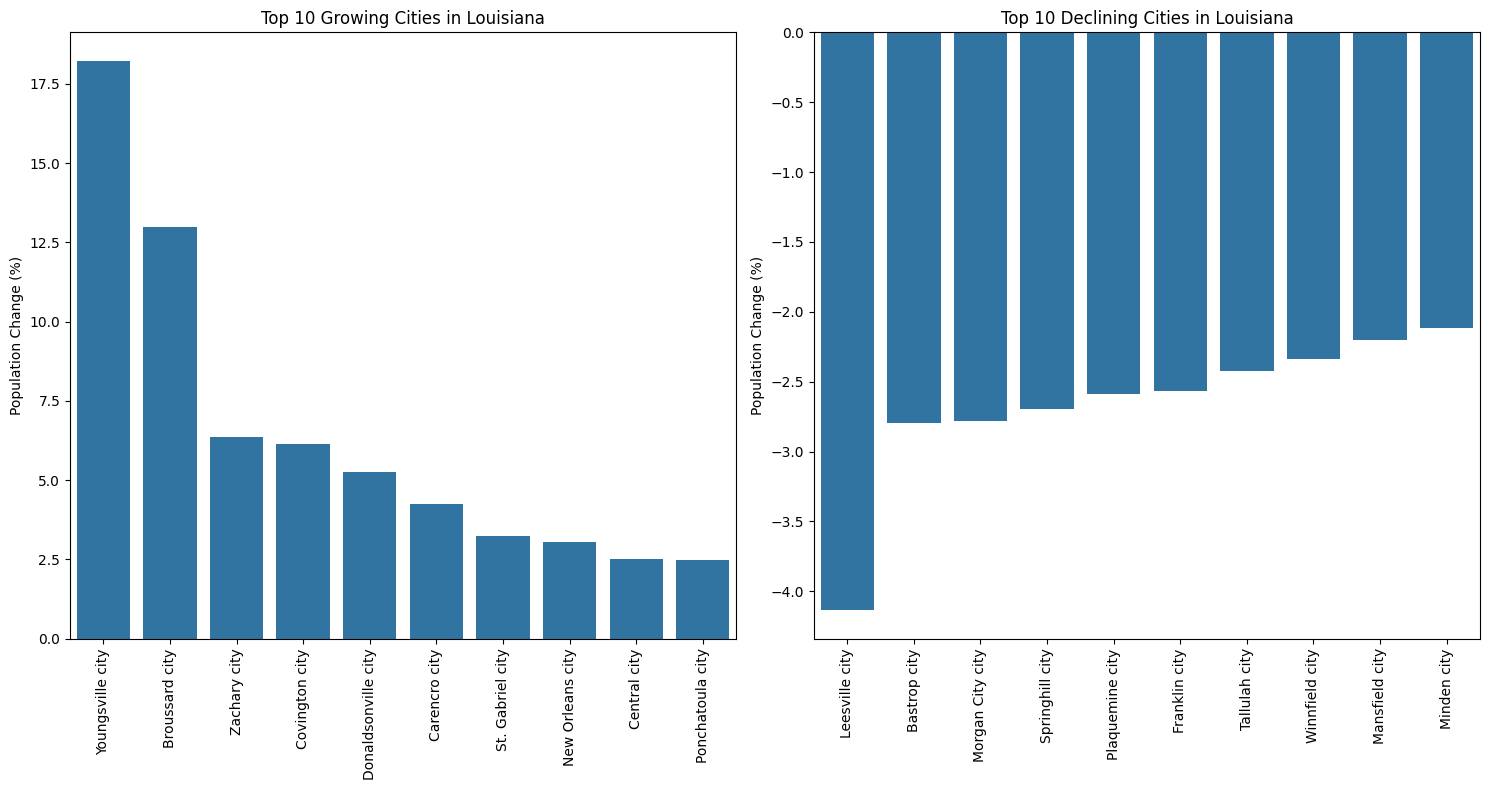

In [18]:
population_change_analysis(census_all, "Louisiana")

##### Where are the most gentrified areas, based on income changes and property price increases?

In [19]:
# 17. Gentrification indicators
def gentrification_analysis(census_data, geojson_data, state):
    # Filter data by state
    data_2015 = census_data[(census_data['year'] == 2015) & (census_data['state'] == state)]
    data_2017 = census_data[(census_data['year'] == 2017) & (census_data['state'] == state)]

    # Merge to calculate changes
    changes = pd.merge(
        data_2015[['name', 'b19013_001e', 'b25077_001e', 'state']],
        data_2017[['name', 'b19013_001e', 'b25077_001e']],
        on='name', suffixes=('_2015', '_2017')
    )
    changes = changes[changes['b25077_001e_2017'] != -666666666]
    # Calculate percentage changes
    changes['income_change_pct'] = ((changes['b19013_001e_2017'] - changes['b19013_001e_2015']) /
                                    changes['b19013_001e_2015']) * 100
    changes['home_value_change_pct'] = ((changes['b25077_001e_2017'] - changes['b25077_001e_2015']) /
                                        changes['b25077_001e_2015']) * 100
    changes['gentrification_score'] = (changes['income_change_pct'] + changes['home_value_change_pct']) / 2

    # Top gentrified counties bar chart
    top_gentrified = changes.sort_values('gentrification_score', ascending=False).head(15)
    plt.figure(figsize=(12, 8))
    g = sns.barplot(x='name', y='gentrification_score', hue='state', data=top_gentrified)
    g.set_xticklabels([x.split(',')[0] for x in top_gentrified['name']], rotation=90)
    plt.title(f'Top 15 Cities by Gentrification Score (2015-2017) - {state}')
    plt.xlabel('County')
    plt.ylabel('Gentrification Score')
    plt.tight_layout()
    plt.savefig(f'top_gentrified_counties_{state}.png', dpi=300)

    # Scatter plot
    plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(x='income_change_pct', y='home_value_change_pct',
                               hue='state', size='b25077_001e_2017',
                               sizes=(50, 500), data=changes, alpha=0.7)
    plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
    plt.axvline(x=0, color='gray', linestyle='--', alpha=0.7)

    for idx, row in top_gentrified.head(5).iterrows():
        plt.text(row['income_change_pct'], row['home_value_change_pct'],
                 row['name'].split(',')[0], fontsize=10)

    plt.fill_between([0, 20], [0, 0], [20, 20], color='red', alpha=0.1)
    plt.text(10, 10, 'High Gentrification', ha='center', fontsize=12)
    plt.title(f'Income Change vs. Home Value Change (2015-2017) - {state}')
    plt.xlabel('Median Household Income Change (%)')
    plt.ylabel('Median Home Value Change (%)')
    plt.tight_layout()
    plt.savefig(f'gentrification_scatter_{state}.png', dpi=300)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16028\2424395044.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



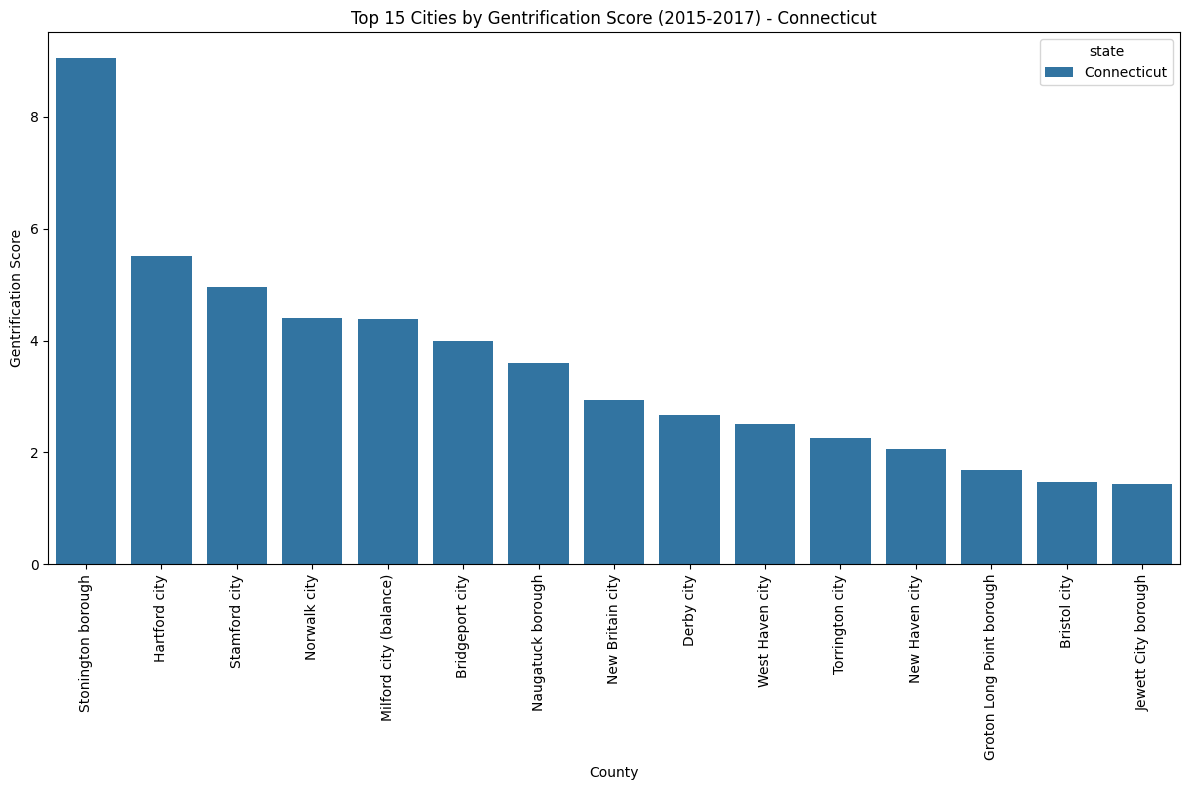

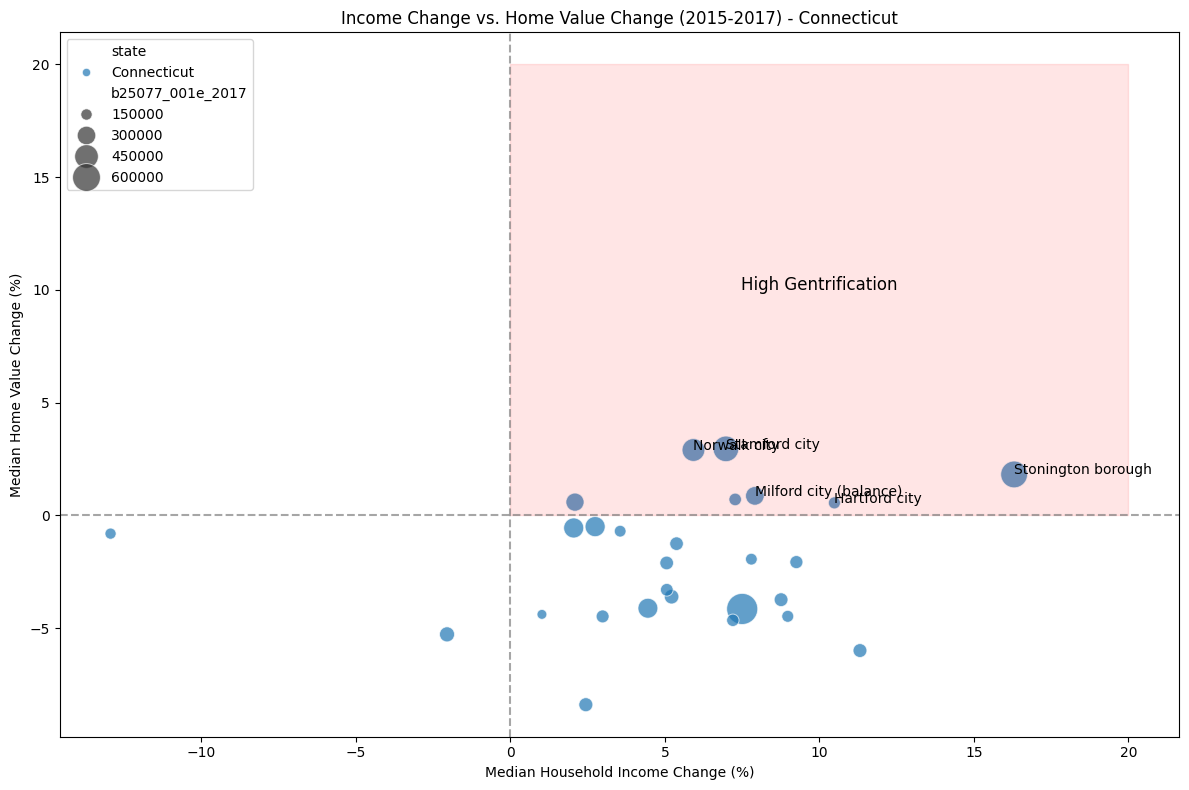

In [20]:
gentrification_analysis(census_all, geojson_data, "Connecticut")

C:\Users\Admin\AppData\Local\Temp\ipykernel_16028\2424395044.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



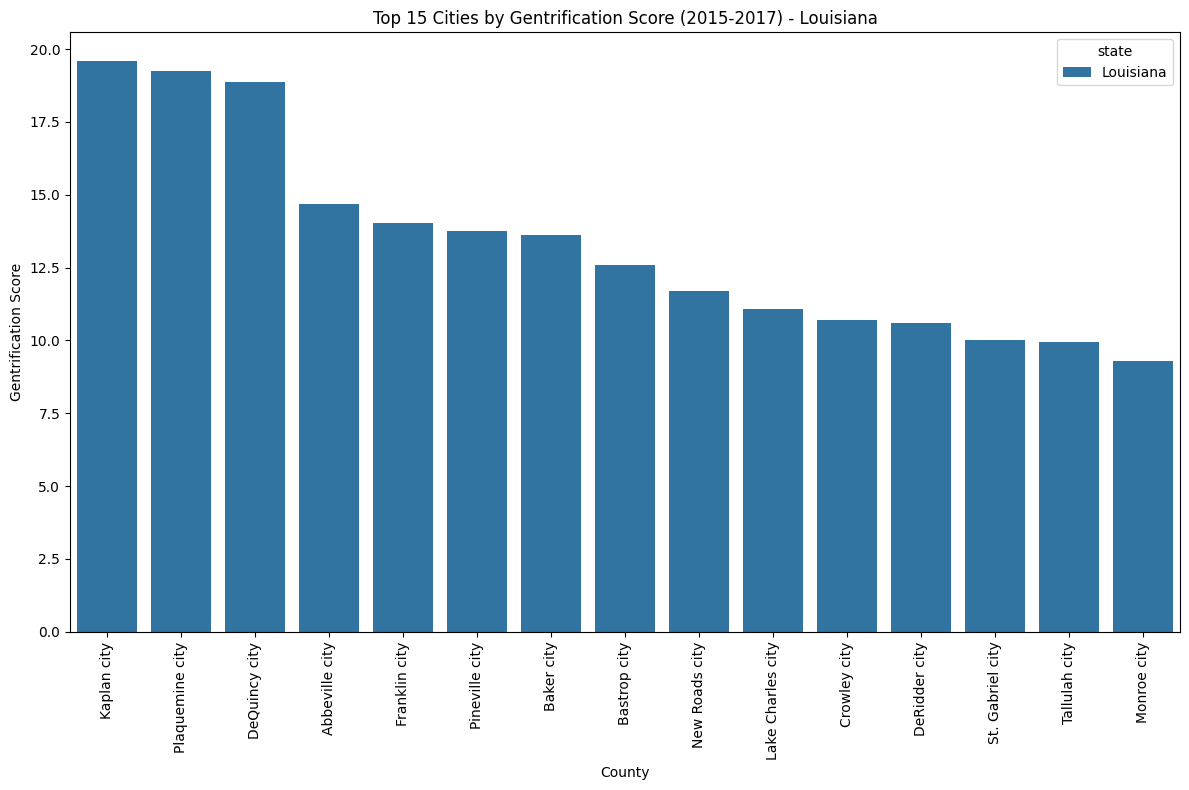

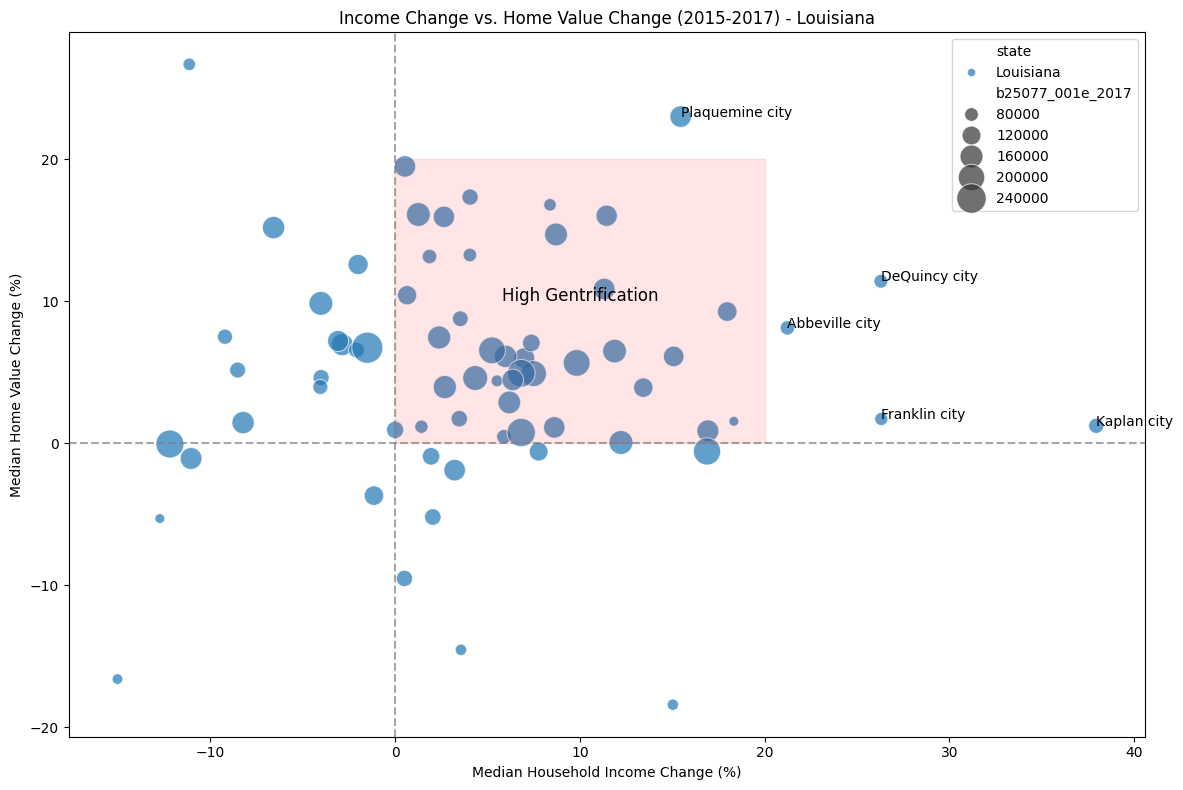

In [21]:
gentrification_analysis(census_all, geojson_data, "Louisiana")

In [22]:
# 17. Gentrification indicators
def choropleth_heat_map(census_data, geojson_data):
    # Filter data by state
    data_2015 = census_county[(census_county['year'] == 2015)]
    data_2017 = census_county[(census_county['year'] == 2017)]

    # Merge to calculate changes
    changes = pd.merge(
        data_2015[['name', 'b19013_001e', 'b25077_001e', 'state']],
        data_2017[['name', 'b19013_001e', 'b25077_001e']],
        on='name', suffixes=('_2015', '_2017')
    )

    # Calculate percentage changes
    changes['income_change_pct'] = ((changes['b19013_001e_2017'] - changes['b19013_001e_2015']) /
                                    changes['b19013_001e_2015']) * 100
    changes['home_value_change_pct'] = ((changes['b25077_001e_2017'] - changes['b25077_001e_2015']) /
                                        changes['b25077_001e_2015']) * 100
    changes['gentrification_score'] = (changes['income_change_pct'] + changes['home_value_change_pct']) / 2

    # Plotly Choropleth Heat Map
    if geojson_data is not None:
        fig = px.choropleth_mapbox(
            changes,
            geojson=geojson_data,
            locations='state',  # now matching county names
            featureidkey='properties.name',  # geojson must have 'name' under properties
            color='gentrification_score',
            color_continuous_scale='RdYlGn',
            mapbox_style='carto-positron',
            zoom=3,
            center={"lat": 37.0902, "lon": -95.7129},
            range_color=(changes['gentrification_score'].min(), changes['gentrification_score'].max()),
            #scope="usa",
            labels={'gentrification_score': 'Gentrification Score'},
            title="Gentrification Heat Map (2015-2017)",
        )
        fig.update_geos(fitbounds="locations", visible=False)
        fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
        fig.show()


In [23]:
choropleth_heat_map(census_all, geojson_data)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16028\407307879.py:23: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

